<a href="https://www.kaggle.com/code/madhav27899/star-classification?scriptVersionId=127716097" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M



Dataset Info:
This is a dataset consisting of several features of stars.

Some of them are:

Absolute Temperature (in K)
Relative Luminosity (L/Lo)
Relative Radius (R/Ro)
Absolute Magnitude (Mv)
Star Color (white,Red,Blue,Yellow,yellow-orange etc)
Spectral Class (O,B,A,F,G,K,,M)
Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**
Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
Ro = 6.9551 x 10^8 m (Avg Radius of Sun)









**About this file:**
This CSV file contains a dataset of 240 stars of 6 classes:



1.   Brown Dwarf -> Star Type = 0
2.   Red Dwarf -> Star Type = 1
3.   White Dwarf-> Star Type = 2
4.   Main Sequence -> Star Type = 3
5.   Supergiant -> Star Type = 4
6.   Hypergiant -> Star Type = 5

The Luminosity and radius of each star is calculated w.r.t. that of the values of Sun.
Lo = 3.828 x 10^26 Watts
Ro = 6.9551 x 10^8 m













In [4]:
df.shape

(240, 7)

In [5]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

No null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


Dtype of all the variables are correctly assigned.

In [7]:
df['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

The dataset is balanced since all the labels have same value count.

In [8]:
df['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

<AxesSubplot:>

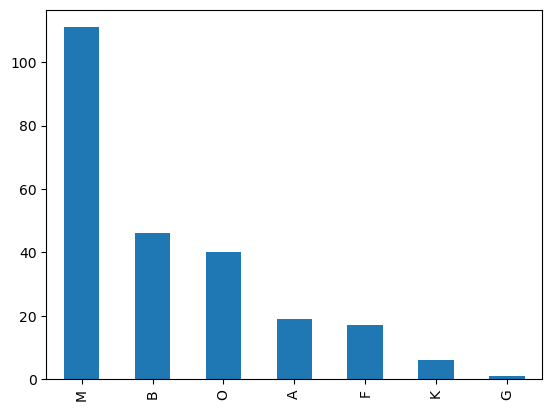

In [9]:
df['Spectral Class'].value_counts().plot.bar()

<AxesSubplot:>

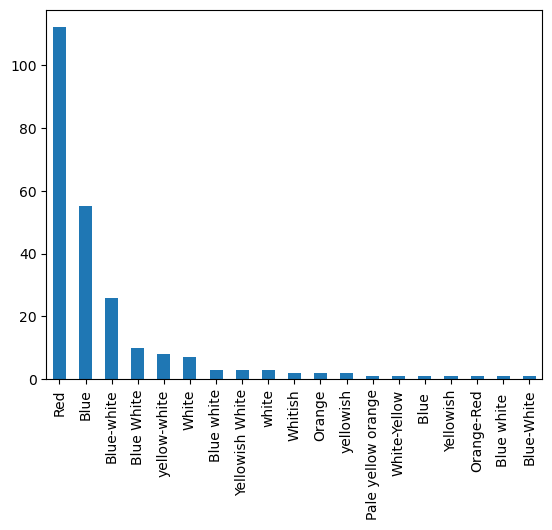

In [10]:
df['Star color'].value_counts().plot.bar()

In [11]:
#Printing the correlation matrix
df.corr()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


<AxesSubplot:>

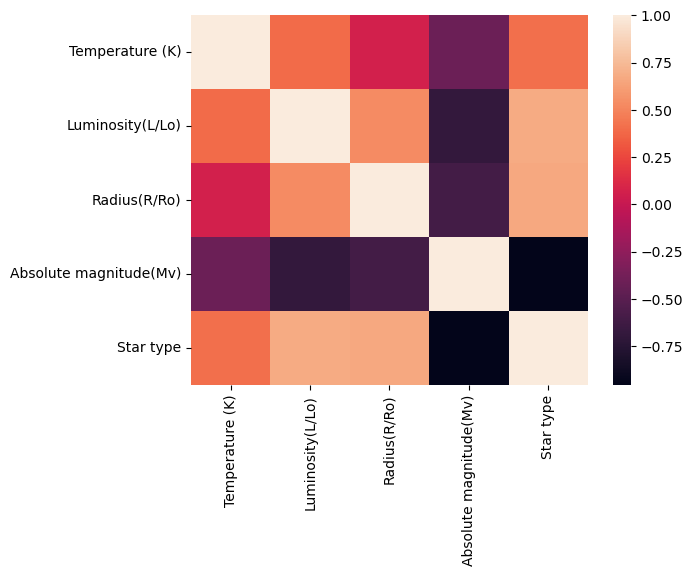

In [12]:
import seaborn as sns
sns.heatmap(df.corr())

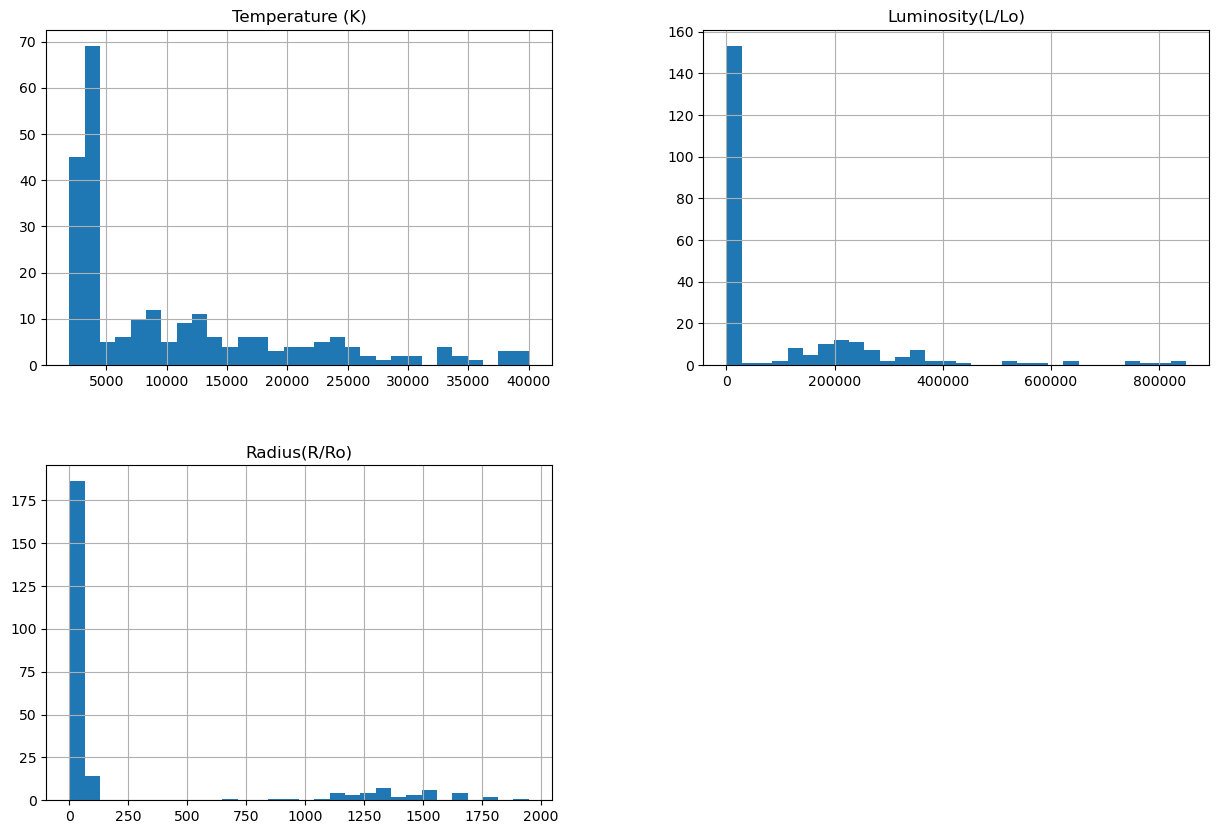

In [13]:
#To find the normality of the data
df.iloc[:,0:3].hist(bins=30, figsize=(15, 10))
plt.show()

In [14]:
#Shapiro Test to check normality
for i in df.iloc[:,0:3].columns:
    print(i,"                     ",stats.shapiro(df[i]))

Temperature (K)                       ShapiroResult(statistic=0.7932270765304565, pvalue=3.967461627653005e-17)
Luminosity(L/Lo)                       ShapiroResult(statistic=0.659732460975647, pvalue=1.1687159346063219e-21)
Radius(R/Ro)                       ShapiroResult(statistic=0.5021535754203796, pvalue=1.6552278874180538e-25)


The values are not normal since the p values are <0.05

In [15]:
#After yeo johnson transformation
for i in df.iloc[:,0:3].columns:
    fitted_data, fitted_lambda =  stats.yeojohnson(df[i])
    print(i,"                    ",stats.shapiro(fitted_data))

Temperature (K)                      ShapiroResult(statistic=0.8823728561401367, pvalue=1.090412699369936e-12)
Luminosity(L/Lo)                      ShapiroResult(statistic=0.6987938284873962, pvalue=1.6979668912020978e-20)
Radius(R/Ro)                      ShapiroResult(statistic=0.8110496997833252, pvalue=2.275585247138608e-16)


The p value improves a little bit but not much to call the data normal

[]

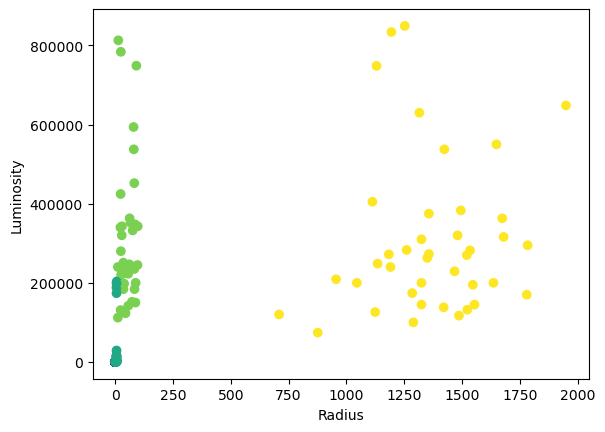

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df['Radius(R/Ro)'],df["Luminosity(L/Lo)"],c=df['Star type'])
plt.xlabel('Radius')
plt.ylabel('Luminosity')
plt.plot()

As we can see clusters that are well separated that means we can build Nearest Neighbor model which can 100% classify the yellow coloured data.

* Since we have two columns that are not numerical hence we will Label Encode them.
* In all Models:
  * Training size= 30%
  * Test size=70 %

In [17]:
#As we can see that the 'Star color' and 'Spectral Class' are categorical in nature hence we need to do Label Encoding
le=LabelEncoder()
df['Star color']=le.fit_transform(df['Star color'])
df['Spectral Class']=le.fit_transform(df['Spectral Class'])

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:3],df['Star type'],test_size=0.3, random_state=42)
NN=KNeighborsClassifier(n_neighbors=1)
NN.fit(X_train,y_train)
pred=NN.predict(X_test)
print('accuracy = ',accuracy_score(y_test,pred))
confusion_matrix(y_test,pred)

accuracy =  0.8333333333333334


array([[14,  0,  0,  0,  0,  0],
       [ 2, 10,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  9,  1,  0],
       [ 0,  0,  0,  0,  7,  4],
       [ 0,  0,  0,  0,  5, 10]])



*   Here we can see that the star 1(Red dwarf) , star 2(white dwarf) and star 3(Main sequence) have the best precision.
*    Hence this model classifies Red dwarf, white dwarf stars correctly



In [19]:
#Using softmax regression for multicalss classification
from sklearn.linear_model import LogisticRegression
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
softReg.fit(X_train,y_train)
pred_soft=softReg.predict(X_test)
print("Accuracy ",accuracy_score(y_test,pred_soft))
confusion_matrix(y_test,pred_soft)

Accuracy  0.4861111111111111


array([[ 0,  0, 10,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 12],
       [ 0,  0,  9,  1,  0,  0],
       [ 0,  0,  0,  0,  3,  7],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0, 15]])

Softmax Regression didnt worked well

[]

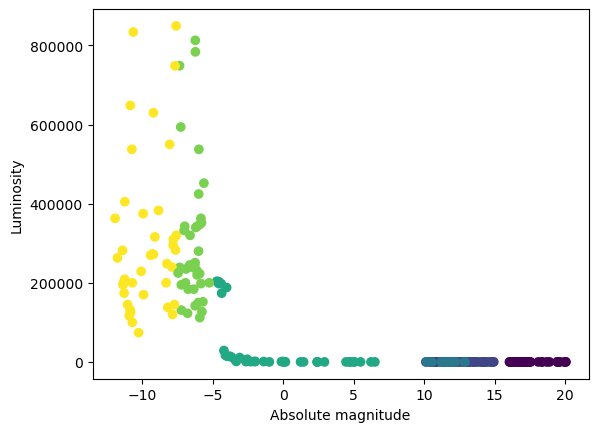

In [20]:
plt.scatter(df['Absolute magnitude(Mv)'],df["Luminosity(L/Lo)"],c=df['Star type'])
plt.xlabel('Absolute magnitude')
plt.ylabel('Luminosity')
plt.plot()

Here also it looks kind of separated therefore we can use KNN

In [21]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,[1,3]],df['Star type'],test_size=0.3, random_state=42)
NN=KNeighborsClassifier(n_neighbors=1)
NN.fit(X_train,y_train)
pred=NN.predict(X_test)
print('accuracy = ',accuracy_score(y_test,pred))
confusion_matrix(y_test,pred)

accuracy =  0.7222222222222222


array([[14,  0,  0,  0,  0,  0],
       [ 0,  9,  3,  0,  0,  0],
       [ 0,  4,  6,  0,  0,  0],
       [ 0,  0,  0,  9,  1,  0],
       [ 0,  0,  0,  0,  7,  4],
       [ 0,  0,  0,  1,  7,  7]])

* Although the accuracy is less, we can see that the precision of Star 0 and star 3 is very high. 

---

*   Here we can see that the model has best precision for star 0(Brown Dwarf)
*    Hence this model classifies Brown dwarf correctly


In [22]:
softReg.fit(X_train,y_train)
pred_soft=softReg.predict(X_test)
print("Accuracy ",accuracy_score(y_test,pred_soft))
confusion_matrix(y_test,pred_soft)

Accuracy  0.4722222222222222


array([[14,  0,  0,  0,  0,  0],
       [12,  0,  0,  0,  0,  0],
       [10,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  1,  6],
       [ 0,  0,  0,  0,  7,  4],
       [ 0,  0,  0,  0,  3, 12]])

*   here also softmax Regression didnt worked well.
*   May be because our data is not normal thats why it didnt worked well.




* The following model is **MODEL1**
* Features: Luminosity, Radius and Absolute Magnitude
* Target: Star type
* We use all the 3 features that are used in the previous model
* We make nearest neighbor model out of it 


In [23]:
#MODEL1
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:4],df['Star type'],test_size=0.3, random_state=42)
NN=KNeighborsClassifier(n_neighbors=1)
NN.fit(X_train,y_train)
pred=NN.predict(X_test)
print('accuracy = ',accuracy_score(y_test,pred))
confusion_matrix(y_test,pred)

accuracy =  0.8194444444444444


array([[14,  0,  0,  0,  0,  0],
       [ 0, 10,  2,  0,  0,  0],
       [ 0,  1,  9,  0,  0,  0],
       [ 0,  0,  0,  9,  1,  0],
       [ 0,  0,  0,  0,  7,  4],
       [ 0,  0,  0,  0,  5, 10]])

* Now we have a model that have high precision for star type 0,1,2,3

Now our aim is to find a model with high precision for star type 4 and 5

In [24]:
#Taking all the data points with label 4 and 5
df_new= df[(df['Star type']==4) | (df['Star type']==5)]

In [25]:
df_new.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
40,3826,200000.0,19.0,-6.93,4,10,5
41,3365,340000.0,23.0,-6.20,4,10,5
42,3270,150000.0,88.0,-6.02,4,10,5
43,3200,195000.0,17.0,-7.22,4,10,5
44,3008,280000.0,25.0,-6.00,4,10,5


In [26]:
#Doing logistic Regression with type 4 and type 5 as two classes
lr1=LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(df_new.drop(columns=['Star type']),df_new['Star type'],test_size=0.3,random_state=42)
lr1.fit(X_train,y_train)
pred1=lr1.predict(X_test)
print('accuracy = ',accuracy_score(y_test,pred1))
confusion_matrix(y_test,pred1)

accuracy =  1.0


array([[14,  0],
       [ 0, 10]])

 

*   Here we obtained an accuracy of 100%. It means with this model we can find whether the star belongs to type 4 or type 5.
*   But including all the variable would be computationally expensive
*   We can find a smaller dimensional feature vector which can give us same accuracy



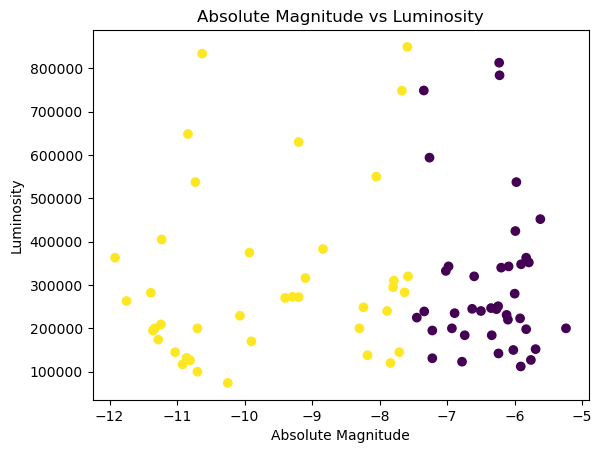

In [27]:
plt.scatter(df_new['Absolute magnitude(Mv)'],df_new["Luminosity(L/Lo)"],c=df_new['Star type'])
plt.xlabel('Absolute Magnitude')
plt.ylabel('Luminosity')
plt.title('Absolute Magnitude vs Luminosity')
plt.show()

The points seems to be separated but not far apart

In [28]:
#Doing logistic Regression with type 4 and type 5 as two classes and 'Absolute Magnitude' and 'Luminosity' as feature vector
lr1=LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(df_new.iloc[:,[1,3]],df_new['Star type'],test_size=0.3,random_state=42)
lr1.fit(X_train,y_train)
pred1=lr1.predict(X_test)
print('accuracy = ',accuracy_score(y_test,pred1))
confusion_matrix(y_test,pred1)

accuracy =  0.4166666666666667


array([[ 0, 14],
       [ 0, 10]])

* Very poor accuracy obtained
* We discard this model

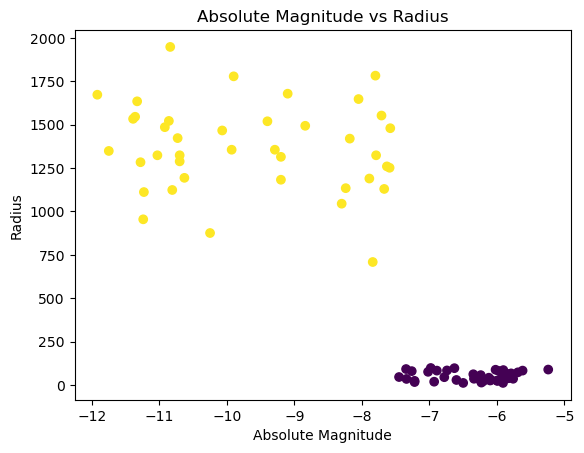

In [29]:
plt.scatter(df_new['Absolute magnitude(Mv)'],df_new["Radius(R/Ro)"],c=df_new['Star type'])
plt.xlabel('Absolute Magnitude')
plt.ylabel('Radius')
plt.title('Absolute Magnitude vs Radius')
plt.show()

*   The points are forming cluster that is same as their star type.
*   We can find a line that can separate the both



* The following model is termed as **MODEL2**
* Features: "Absolute Magnitude" and "Radius"*
* Target  : "Star type"

In [30]:
#Doing logistic Regression with type 4 and type 5 as two classes
lr1=LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(df_new.iloc[:,2:4],df_new['Star type'],test_size=0.3,random_state=42)
lr1.fit(X_train,y_train)
pred1=lr1.predict(X_test)
print('accuracy = ',accuracy_score(y_test,pred1))
confusion_matrix(y_test,pred1)

accuracy =  1.0


array([[14,  0],
       [ 0, 10]])

Here we obtained an accuracy of 100%. It means with this model we can find whether the star belongs to type 4 or type 5.

Overall Algorithm:

* step 1: Find the star type assigned by the MODEL1
* step 2:

```
if (the assigned type == 0,1,2 or 3):
    the assigned value is correct
else:
    the star type is either 4 or 5
    go to step 3
```

step 3: Find the star type assigned by the MODEL2 (The obtained value  will be correct)


******************************* Implementation of above Algorithm**********************************

In [31]:
df_list=[]
for i in range(150):
  X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:4],df['Star type'],test_size=0.3) #Train test split of original data
  train_size=len(X_train) #length of the training data
  #Nearest Neighbor
  NN=KNeighborsClassifier(n_neighbors=1) 
  NN.fit(X_train,y_train)
  y_pred=NN.predict(X_test)
  acc_model1=accuracy_score(y_pred,y_test) #Stores accuracy of model 1
  indices = [i for i in range(len(y_test)) if y_test.values[i] != y_pred[i]] #stores indices of wrongly classified data points
  df_indices=df[df.index.isin(indices)] #stores the datapoints of the index indices
  #Logistic Regression
  lr1=LogisticRegression() 
  X=df[~df.index.isin(indices)] #stores the data points whose index does not match the indices 
  X_train,X_test,y_train,y_test = train_test_split(X[(X['Star type']==4) | (X['Star type']==5)].iloc[:,2:4],X[(X['Star type']==4) | (X['Star type']==5)]['Star type'],test_size=0.3)
  lr1.fit(X_train,y_train)
  pred1=lr1.predict(df_indices.iloc[:,2:4])
  y_real=df[df.index.isin(indices)]['Star type'] #stores the real class label of index 'indices'
  n=accuracy_score(pred1,y_real.values)*len(indices) #Gets accuracy of Model 1
  accuracy = (train_size-len(indices)+n)/train_size #stores accuracy after Model 2 is conjuncted
  data=pd.DataFrame({'Accuracy of Model 1':[acc_model1], 'Accuracy After Model 2':[accuracy]})
  df_list.append(data)

In [32]:
df_accuracy=pd.concat(df_list,ignore_index=True)
df_accuracy

,Accuracy of Model 1,Accuracy After Model 2
0,0.791667,0.940476
1,0.708333,0.910714
2,0.805556,0.934524
3,0.847222,0.952381
4,0.763889,0.922619
...,...,...
145,0.819444,0.946429
146,0.805556,0.940476
147,0.763889,0.952381
148,0.833333,0.964286


In [33]:
df_accuracy.describe()

,Accuracy of Model 1,Accuracy After Model 2
count,150.000000,150.000000
mean,0.808519,0.941349
std,0.040727,0.015036
min,0.680556,0.892857
25%,0.791667,0.934524
50%,0.812500,0.940476
75%,0.833333,0.952381
max,0.902778,0.976190


* The above data tells that after the conjunction of Model 2, the accuracy inceased significantly
* The standard deviation of both the columns are low that means there is no drastic change in accuracy from the mean



<AxesSubplot:xlabel='Accuracy of Model 1', ylabel='Density'>

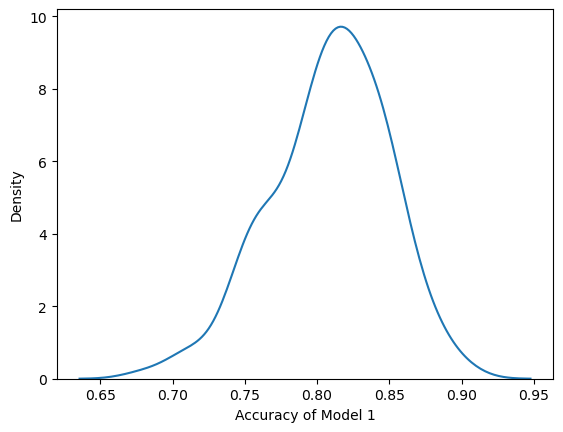

In [34]:
import seaborn as sns
sns.kdeplot(data=df_accuracy,x='Accuracy of Model 1')

<AxesSubplot:xlabel='Accuracy After Model 2', ylabel='Density'>

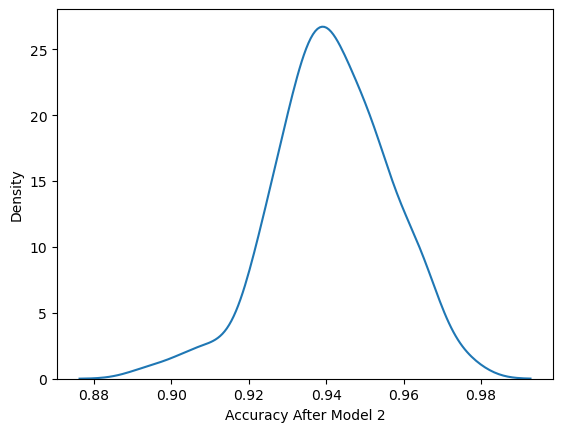

In [35]:
sns.kdeplot(data=df_accuracy,x='Accuracy After Model 2')

In [36]:
print('Accuracy After Model 2  ',stats.shapiro(df_accuracy['Accuracy After Model 2']))
print('Accuracy of Model 1 ',stats.shapiro(df_accuracy['Accuracy of Model 1']))

Accuracy After Model 2   ShapiroResult(statistic=0.9745590090751648, pvalue=0.006940368562936783)
Accuracy of Model 1  ShapiroResult(statistic=0.9757724404335022, pvalue=0.00939830020070076)


Both of the columns are almost Normally distributed since the p value is near to 0.05 in Shapiro test

***Conclusion***
1. We obtained a model that can classify stars with a very high accuracy
2. We can draw conclusion about the star type without knowing the features such as 'Temperature (K)' , 'Star color' and 'Spectral Class'.
3. The softmax classifier has performed very poorly 
4. We have a model with an accuracy of around 0.939921.

